In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
rent_data = pd.read_csv('./output/master_data.csv')
rent_data.head()

,City,State,lat,long,Metro,County,2010-12,2011-12,2012-12,2013-12,...,2016-12,2017-12,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019_Avg,State_abbrev
0,Ontario,California,34.0394,-117.6042,Riverside-San Bernardino-Ontario,San Bernardino County,NaN,NaN,NaN,NaN,...,NaN,1521.0,1637.0,1650.0,1649.0,1622.5,1647.0,1594.5,1632.6,CA
1,Santa Clara,California,37.3646,-121.9679,San Jose-Sunnyvale-Santa Clara,Santa Clara County,NaN,NaN,1727.0,1886.0,...,2425.0,2395.0,2550.0,2533.0,2623.5,2588.5,2509.5,2545.0,2559.9,CA
2,Fresno,California,36.7836,-119.7934,Fresno,Fresno County,NaN,NaN,NaN,NaN,...,595.0,650.0,775.0,795.0,795.0,800.0,850.0,907.5,829.5,CA
3,Akron,Ohio,41.0805,-81.5214,Akron,Summit County,NaN,NaN,NaN,NaN,...,NaN,535.0,550.0,550.0,550.0,540.0,580.0,575.0,559.0,OH
4,Syracuse,New York,43.0410,-76.1436,Syracuse,Onondaga County,NaN,NaN,NaN,NaN,...,NaN,NaN,800.0,800.0,750.0,800.0,825.0,797.5,794.5,NY


### Analyzing the Average 2019 Rent Price
* Is average rent for 219 uniformly distributed?
* Are there outliers?

In [20]:
rent_data['2019_Avg'].describe()

count     242.000000
mean     1288.907025
std       529.479964
min       480.500000
25%       895.750000
50%      1236.050000
75%      1576.200000
max      3524.000000
Name: 2019_Avg, dtype: float64

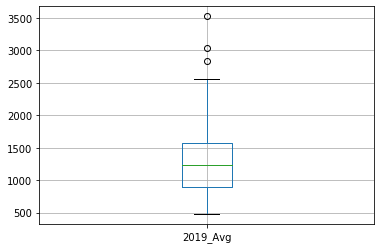

In [19]:
rent_data.boxplot('2019_Avg')

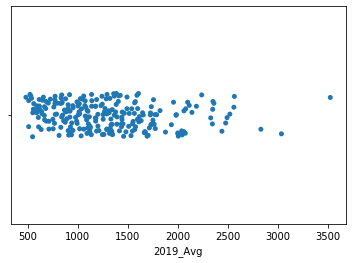

In [18]:
sns.stripplot(rent_data['2019_Avg'])

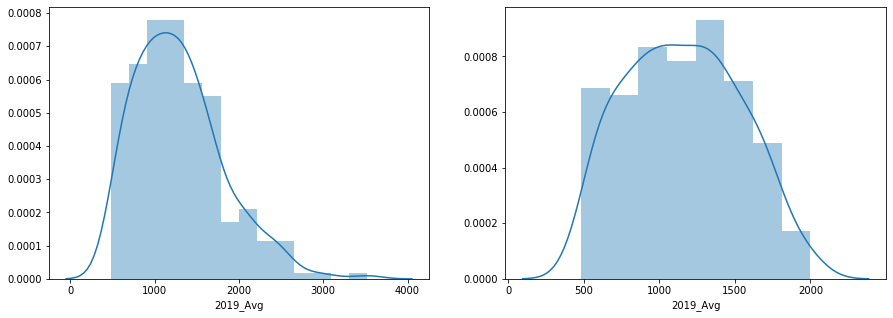

In [41]:
high_rent = rent_data[['City','State','Metro','2019_Avg']][rent_data['2019_Avg'] >= 2000]
low_rent = rent_data[['City','State','Metro','2019_Avg']][rent_data['2019_Avg'] < 2000]

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))

sns.distplot(rent_data['2019_Avg'], ax=ax1)
sns.distplot(low_rent['2019_Avg'], ax=ax2)

Based on the above, we clearly see that the average rent for the 242 cities in the sample follow a general uniform distribution, albeit with a clear left skew. The majority of cities seem to have rent around \$1,000 - \$1,500 per month. There also seem to be a few outliers around the 2,000+ mark:

In [42]:
# Analyze cities with high rent (>= $2,000)

print(high_rent.shape)

high_rent_grouped = high_rent.groupby('State').count()
high_rent_grouped

(27, 4)


,City,Metro,2019_Avg
State,,,
California,19,19,19
Connecticut,1,1,1
District of Columbia,1,1,1
Massachusetts,2,2,2
New Jersey,1,1,1
New York,1,1,1
Washington,2,2,2


70% of the 27 cities with average rent of a 1 bedroom apartment in excess of 2,000/mo are located in Califronia which isn't terribly surprising. Let's group by metro area:

In [32]:
high_rent_grouped = high_rent.groupby('Metro').count()
high_rent_grouped

,City,State,2019_Avg
Metro,,,
Boston-Cambridge-Newton,2,2,2
Bridgeport-Stamford-Norwalk,1,1,1
Los Angeles-Long Beach-Anaheim,8,8,8
New York-Newark-Jersey City,2,2,2
San Diego-Carlsbad,2,2,2
San Francisco-Oakland-Hayward,6,6,6
San Jose-Sunnyvale-Santa Clara,3,3,3
Seattle-Tacoma-Bellevue,2,2,2
Washington-Arlington-Alexandria,1,1,1


Again, not surprising that 50% of the high rent cities are located in just two metro areas. It would be wise to exclude these cities from our development so as not to bias results